

# Initial Setup



In [118]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [119]:
import os
import tensorflow as tf
import tensorflow_addons as tfa
import numpy as np

# Set the seed for random operations. 
# Letting experiments to be reproducible. 
SEED = 1234
tf.random.set_seed(SEED) 
np.random.seed(SEED)

# Get current working directory
cwd = os.getcwd()

In [120]:
# Mounting google drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# Dataset Retrieval

In [121]:
# Option to set to true the first time to RETRIEVE the dataset and create the
# folder structure. If set to false it expects the dataset to be already 
# splitted and zipped in your drive in the directory "Challenge_2".
SPLIT_DATASET = False

# This option let you use your dataset_split.json file, that must be located in 
# your drive in the directory "Challenge_2", for the dataset split.
# Is considered only if SPLIT_DATASET == True since if SPLIT_DATASET == 
# False the dataset is expected to be already splitted and zipped in your
# drive in the directory "Challenge_2".
LOAD_FROM_JSON = False

### Cells executed if: SPLIT_DATASET = True 

In [122]:
if SPLIT_DATASET == True:
  ! unzip '/content/drive/My Drive/Challenge_2/Development_Dataset.zip'

In [123]:
# -----------------------------
# Create the dataset_split.json 
# -----------------------------
if SPLIT_DATASET == True and LOAD_FROM_JSON == False:

  from PIL import Image
  import json
  
  VALIDATION_SPLIT = 0.15

  split = {}
  split['training'] = {}
  split['validation'] = {}

  teams = ['Bipbip', 'Pead', 'Roseau', 'Weedelec']
  plants = ['Haricot', 'Mais']

  # Random seed for reproducibility
  np.random.seed(SEED)

  for t in teams:

    split['training'][t] = {}
    split['validation'][t] = {}

    for p in plants:

      split['training'][t][p] = []      
      split['validation'][t][p] = []

      image_filenames = os.listdir('/content/Development_Dataset/Training/' + t + '/' + p + '/' + 'Images')
      # Shuffle the images to get a random split
      np.random.shuffle(image_filenames)
          
      # Create training split
      for i in range(int(len(image_filenames) * (1 - VALIDATION_SPLIT))):
        image_name = image_filenames[i].split('.')
        split['training'][t][p].append(image_name)

      
      # Create validation split
      for j in range(i + 1, len(image_filenames)):
        image_name = image_filenames[j].split('.')
        split['validation'][t][p].append(image_name)

  with open(os.path.join(cwd, 'dataset_split.json'), 'w') as f:
    json.dump(split, f)

  ! cp '/content/dataset_split.json' '/content/drive/My Drive/Challenge_2/dataset_split.json'

In [124]:
# ------------------------------------------
# Create the splitted dataset directory tree 
# ------------------------------------------
if SPLIT_DATASET == True:
  import shutil
  
  # Use your dataset_split.json 
  # ---------------------------
  if LOAD_FROM_JSON == True:
    import json
    f = open('/content/drive/My Drive/Challenge_2/dataset_split.json')
    split = json.load(f) 
    ! cp '/content/drive/My Drive/Challenge_2/dataset_split.json' '/content/dataset_split.json'  
  # ---------------------------


  # Create the folder for the splitted dataset
  # ------------------------------------------
  ! mkdir '/content/Development_Dataset_15'

  ! mkdir '/content/Development_Dataset_15/training'
  ! mkdir '/content/Development_Dataset_15/training/images'
  ! mkdir '/content/Development_Dataset_15/training/masks'

  ! mkdir '/content/Development_Dataset_15/validation'
  ! mkdir '/content/Development_Dataset_15/validation/images'
  ! mkdir '/content/Development_Dataset_15/validation/masks'
  # ------------------------------------------

  teams = ['Bipbip', 'Pead', 'Roseau', 'Weedelec']
  plants = ['Haricot', 'Mais']

  for t in teams:
    for p in plants:

      for img_name in split['training'][t][p]:
        
        src_path = os.path.join(cwd, 'Development_Dataset/Training/' + t + '/' + p + '/' + 'Images', img_name[0] + '.' + img_name[1])
        dst_path = os.path.join(cwd, 'Development_Dataset_15/training/images')
        shutil.move(src_path, dst_path)

        src_path = os.path.join(cwd, 'Development_Dataset/Training/' + t + '/' + p + '/' + 'Masks', img_name[0] + '.png')
        dst_path = os.path.join(cwd, 'Development_Dataset_15/training/masks')
        shutil.move(src_path, dst_path)

      for img_name in split['validation'][t][p]:
    
        src_path = os.path.join(cwd, 'Development_Dataset/Training/' + t + '/' + p + '/' + 'Images', img_name[0] + '.' + img_name[1])
        dst_path = os.path.join(cwd, 'Development_Dataset_15/validation/images')
        shutil.move(src_path, dst_path)
    
        src_path = os.path.join(cwd, 'Development_Dataset/Training/' + t + '/' + p + '/' + 'Masks', img_name[0] + '.png')
        dst_path = os.path.join(cwd, 'Development_Dataset_15/validation/masks')
        shutil.move(src_path, dst_path)
  ! ls

In [125]:
# ------------------------------------------------------------------------------------------
# Zip the splitted dataset for the next executions, to avoid the splitting process each time
# ------------------------------------------------------------------------------------------
if SPLIT_DATASET == True:
  ! zip -r '/content/drive/My Drive/Challenge_2/Development_Dataset_15.zip' 'Development_Dataset_15'

### Cells executed if: SPLIT_DATASET = False 

In [126]:
# --------------------------------------------------------------------------------
# Unzip the json file with the split used and the splitted dataset from your drive
# --------------------------------------------------------------------------------
if SPLIT_DATASET == False:
  # Get dataset_split.json
  ! cp '/content/drive/My Drive/Challenge_2/dataset_split.json' '/content/dataset_split.json' 
  # Get the splitted dataset
  ! unzip '/content/drive/My Drive/Challenge_2/Development_Dataset_15.zip'

Archive:  /content/drive/My Drive/Challenge_2/Development_Dataset_15.zip
  inflating: Development_Dataset_15/validation/images/Bipbip_mais_im_05221.jpg  
  inflating: Development_Dataset_15/validation/images/Roseau_mais_0336_false.png  
  inflating: Development_Dataset_15/validation/images/Roseau_haricot_0212_false.png  
  inflating: Development_Dataset_15/validation/images/Bipbip_mais_im_01601.jpg  
  inflating: Development_Dataset_15/validation/images/Roseau_mais_0140_false.png  
  inflating: Development_Dataset_15/validation/images/Bipbip_mais_im_01871.jpg  
  inflating: Development_Dataset_15/validation/images/Roseau_mais_0120_false.png  
  inflating: Development_Dataset_15/validation/images/Pead_mais_00666_i900.jpg  
replace Development_Dataset_15/validation/images/Pead_mais_00615_i900.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: Development_Dataset_15/validation/images/Pead_mais_00615_i900.jpg  
  inflating: Development_Dataset_15/validation/images/Roseau_mais_0238_f

In [127]:
import json

subset_file = os.path.join('/content', 'dataset_split.json')
with open(subset_file, 'r') as f:
  data = json.load(f)

data


{'training': {'Bipbip': {'Haricot': [['Bipbip_haricot_im_05741', 'jpg'],
    ['Bipbip_haricot_im_05301', 'jpg'],
    ['Bipbip_haricot_im_06341', 'jpg'],
    ['Bipbip_haricot_im_06101', 'jpg'],
    ['Bipbip_haricot_im_08071', 'jpg'],
    ['Bipbip_haricot_im_06531', 'jpg'],
    ['Bipbip_haricot_im_06801', 'jpg'],
    ['Bipbip_haricot_im_05991', 'jpg'],
    ['Bipbip_haricot_im_05481', 'jpg'],
    ['Bipbip_haricot_im_05461', 'jpg'],
    ['Bipbip_haricot_im_05361', 'jpg'],
    ['Bipbip_haricot_im_00321', 'jpg'],
    ['Bipbip_haricot_im_04401', 'jpg'],
    ['Bipbip_haricot_im_05911', 'jpg'],
    ['Bipbip_haricot_im_02301', 'jpg'],
    ['Bipbip_haricot_im_03571', 'jpg'],
    ['Bipbip_haricot_im_03611', 'jpg'],
    ['Bipbip_haricot_im_05231', 'jpg'],
    ['Bipbip_haricot_im_04301', 'jpg'],
    ['Bipbip_haricot_im_03481', 'jpg'],
    ['Bipbip_haricot_im_03411', 'jpg'],
    ['Bipbip_haricot_im_03231', 'jpg'],
    ['Bipbip_haricot_im_04541', 'jpg'],
    ['Bipbip_haricot_im_05411', 'jpg'],
    ['B

# Dataset Setup

In [128]:
# --------------------------------------------------------------------------------------
# Create the training and validation ImageDataGenerator objects for from scratch network
# --------------------------------------------------------------------------------------
#def data_generator(apply_data_augmentation):

from tensorflow.keras.preprocessing.image import ImageDataGenerator

apply_data_augmentation = True

# Create training ImageDataGenerator object
# We need two different generators for images and corresponding masks
if apply_data_augmentation:
  img_data_gen = ImageDataGenerator(rotation_range=10,
                                      width_shift_range=10,
                                      height_shift_range=10,
                                      zoom_range=0.3,
                                      horizontal_flip=True,
                                      vertical_flip=True,
                                      fill_mode='reflect',
                                    rescale=1. / 255)
    
  mask_data_gen = ImageDataGenerator(rotation_range=10,
                                       width_shift_range=10,
                                       height_shift_range=10,
                                       zoom_range=0.3,
                                       horizontal_flip=True,
                                       vertical_flip=True,
                                       fill_mode='reflect')
    
#return img_data_gen, mask_data_gen

In [129]:
from PIL import Image

class CustomDataset(tf.keras.utils.Sequence):

  """
    CustomDataset inheriting from tf.keras.utils.Sequence.

    3 main methods:
      - __init__: save dataset params like directory, filenames..
      - __len__: return the total number of samples in the dataset
      - __getitem__: return a sample from the dataset

    Note: 
      - the custom dataset return a single sample from the dataset. Then, we use 
        a tf.data.Dataset object to group samples into batches.
      - in this case we have a different structure of the dataset in memory. 
        We have all the images in the same folder and the training and validation splits
        are defined in text files.

  """

  def __init__(self, dataset_dir, which_subset, img_generator=None, mask_generator=None, 
               preprocessing_function=None, out_shape=[500, 500]):
    import json
    
    subset_file = os.path.join('/content', 'dataset_split.json')
    with open(subset_file, 'r') as f:
      split = json.load(f)
    
    teams = ['Bipbip', 'Pead', 'Roseau', 'Weedelec']
    plants = ['Haricot', 'Mais']
    
    subset_filenames = []
    
    for t in teams:
      for p in plants:
        
        for img_name in split[which_subset][t][p]:
          subset_filenames.append(img_name) 

    self.which_subset = which_subset
    self.dataset_dir = dataset_dir
    self.subset_filenames = subset_filenames
    self.img_generator = img_generator
    self.mask_generator = mask_generator
    self.preprocessing_function = preprocessing_function
    self.out_shape = out_shape

  def __len__(self):
    return len(self.subset_filenames)

  def __getitem__(self, index):
    # Read Image
    curr_filename = self.subset_filenames[index]
    img = Image.open(os.path.join(self.dataset_dir, self.which_subset, 'images', curr_filename[0] + '.' + curr_filename[1]))
    mask = Image.open(os.path.join(self.dataset_dir, self.which_subset, 'masks', curr_filename[0] + '.png'))   

    # Resize image and mask
    img = img.resize(self.out_shape)
    mask = mask.resize(self.out_shape, resample=Image.NEAREST) 

    img_arr = np.array(img)
    mask_arr = np.array(mask)
    
    # RGB to target
    # -------------
    new_mask_arr = np.zeros(mask_arr.shape[:2], dtype=mask_arr.dtype)

    # Use RGB dictionary in 'RGBtoTarget.txt' to convert RGB to target
    new_mask_arr[np.where(np.all(mask_arr == [0, 0, 0], axis=-1))] = 0
    new_mask_arr[np.where(np.all(mask_arr == [216, 124, 18], axis=-1))] = 0
    new_mask_arr[np.where(np.all(mask_arr == [255, 255, 255], axis=-1))] = 1
    new_mask_arr[np.where(np.all(mask_arr == [216, 67, 82], axis=-1))] = 2

    mask_arr = np.expand_dims(new_mask_arr, -1)
    # -------------

    # in this dataset 255 mask label is assigned to an additional class, which corresponds 
    # to the contours of the objects. We remove it for simplicity.
    #mask_arr[mask_arr == 255] = 0  

    if self.which_subset == 'training':
      if self.img_generator is not None and self.mask_generator is not None:
        # Perform data augmentation
        # We can get a random transformation from the ImageDataGenerator using get_random_transform
        # and we can apply it to the image using apply_transform
        img_t = self.img_generator.get_random_transform(img_arr.shape, seed=SEED)
        mask_t = self.mask_generator.get_random_transform(mask_arr.shape, seed=SEED)
        img_arr = self.img_generator.apply_transform(img_arr, img_t)
        # ImageDataGenerator use bilinear interpolation for augmenting the images.
        # Thus, when applied to the masks it will output 'interpolated classes', which
        # is an unwanted behaviour. As a trick, we can transform each class mask 
        # separately and then we can cast to integer values (as in the binary segmentation notebook).
        # Finally, we merge the augmented binary masks to obtain the final segmentation mask.
        out_mask = np.zeros_like(mask_arr)
        for c in np.unique(mask_arr):
          if c > 0:
            curr_class_arr = np.float32(mask_arr == c)
            curr_class_arr = self.mask_generator.apply_transform(curr_class_arr, mask_t)
            # from [0, 1] to {0, 1}
            curr_class_arr = np.uint8(curr_class_arr)
            # recover original class
            curr_class_arr = curr_class_arr * c 
            out_mask += curr_class_arr
    else:
      out_mask = mask_arr
    
    if self.preprocessing_function is not None:
        img_arr = self.preprocessing_function(img_arr)

    return img_arr, np.float32(out_mask)

# Example: Image Segmentation
## Build segmentation

In [130]:
from tensorflow.keras.applications.vgg16 import preprocess_input 

img_h = 256
img_w = 256

def preprocess_function(img_arr):
  img_arr = img_arr / 255.
  return img_arr


dataset = CustomDataset('/content/Development_Dataset_15',
                        'training', 
                        img_generator=img_data_gen, 
                        mask_generator=mask_data_gen,
                        out_shape=[img_h, img_w]
                        )

dataset_valid = CustomDataset('/content/Development_Dataset_15',
                              'validation',
                              out_shape=[img_h, img_w]
                              )


In [131]:
bs = 3

train_dataset = tf.data.Dataset.from_generator(lambda: dataset,
                                               output_types=(tf.float32, tf.float32),
                                               output_shapes=([img_h, img_w, 3], [img_h, img_w, 1]))
train_dataset = train_dataset.batch(bs)

train_dataset = train_dataset.repeat()

valid_dataset = tf.data.Dataset.from_generator(lambda: dataset_valid,
                                               output_types=(tf.float32, tf.float32),
                                               output_shapes=([img_h, img_w, 3], [img_h, img_w, 1]))
valid_dataset = valid_dataset.batch(bs)

valid_dataset = valid_dataset.repeat()

In [132]:
# Let's test data generator
# -------------------------
import time
from matplotlib import cm
import matplotlib.pyplot as plt

%matplotlib inline

# Assign a color to each class
evenly_spaced_interval = np.linspace(0, 1, 3)
colors = [cm.rainbow(x) for x in evenly_spaced_interval]

iterator = iter(train_dataset)

In [133]:
augmented_img, target = next(iterator)

[0. 1. 2.]


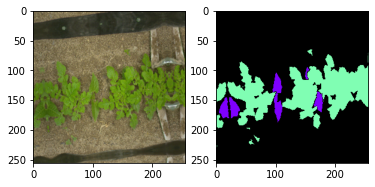

'\naugmented_img, target = next(iterator)\n\nrgb_img = cv2.imread(\'/content/Development_Dataset_15/training/images/Pead_mais_00070_i900.jpg\', cv2.IMREAD_UNCHANGED)  # open image\nproper_h = 384\nproper_w = 512\n    # resize to see how it works with kernels\n\n    # get exgreen\nexgr = None\nexgr_mask = None\nexgr = exgreen(rgb_img)\nprint("Exgr shape: ", exgr.shape)\n\nexgr_mask = thresh(exgr, 50)\n#exgr.resize([proper_h, proper_w, 3])\nim_gray_plt(exgr)\nim_gray_plt(exgr_mask)\n'

In [134]:
fig, ax = plt.subplots(1, 2)

augmented_img = augmented_img[0]   # First element
augmented_img = augmented_img  # denormalize

target = np.array(target[0, ..., 0])   # First element (squeezing channel dimension)

print(np.unique(target))

target_img = np.zeros([target.shape[0], target.shape[1], 3])

target_img[np.where(target == 0)] = [0, 0, 0]
for i in range(1, 3):
  target_img[np.where(target == i)] = np.array(colors[i-1])[:3] * 255

ax[0].imshow(np.uint8(augmented_img))
ax[1].imshow(np.uint8(target_img))

plt.show()


'''
augmented_img, target = next(iterator)

rgb_img = cv2.imread('/content/Development_Dataset_15/training/images/Pead_mais_00070_i900.jpg', cv2.IMREAD_UNCHANGED)  # open image
proper_h = 384
proper_w = 512
    # resize to see how it works with kernels

    # get exgreen
exgr = None
exgr_mask = None
exgr = exgreen(rgb_img)
print("Exgr shape: ", exgr.shape)

exgr_mask = thresh(exgr, 50)
#exgr.resize([proper_h, proper_w, 3])
im_gray_plt(exgr)
im_gray_plt(exgr_mask)
'''

In [135]:
vgg = tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=(img_h, img_w, 3))
vgg.summary()
for layer in vgg.layers:
  layer.trainable = False

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0     

**Convolutional Neural Network (CNN)**


**Encoder-Decoder**





In [136]:
def create_model(depth, start_f, num_classes):

    model = tf.keras.Sequential()
    
    # Encoder
    # -------
    model.add(vgg)
    
    start_f = 256
        
    # Decoder
    # -------
    for i in range(depth):
        model.add(tf.keras.layers.UpSampling2D(2, interpolation='bilinear'))
        model.add(tf.keras.layers.Conv2D(filters=start_f,
                                         kernel_size=(3, 3),
                                         strides=(1, 1),
                                         padding='same'))
        model.add(tf.keras.layers.ReLU())

        start_f = start_f // 2

    # Prediction Layer
    # ----------------
    model.add(tf.keras.layers.Conv2D(filters=num_classes,
                                     kernel_size=(1, 1),
                                     strides=(1, 1),
                                     padding='same',
                                     activation='softmax'))
    
    return model

In [137]:
model = create_model(depth=5, 
                     start_f=8, 
                     num_classes=3)

# Visualize created model as a table
model.summary()

# Visualize initialized weights
# model.weights

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 8, 8, 512)         14714688  
_________________________________________________________________
up_sampling2d_17 (UpSampling (None, 16, 16, 512)       0         
_________________________________________________________________
conv2d_78 (Conv2D)           (None, 16, 16, 256)       1179904   
_________________________________________________________________
re_lu_5 (ReLU)               (None, 16, 16, 256)       0         
_________________________________________________________________
up_sampling2d_18 (UpSampling (None, 32, 32, 256)       0         
_________________________________________________________________
conv2d_79 (Conv2D)           (None, 32, 32, 128)       295040    
_________________________________________________________________
re_lu_6 (ReLU)               (None, 32, 32, 128)      

## Convolutional Neural Network (CNN)
### Encoder-Decoder

In [138]:
import numpy as np 
import os
import skimage.io as io
import skimage.transform as trans
import numpy as np
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras import backend as keras

## Prepare the model for training

In [139]:
# Optimization params
# -------------------

# Loss
# Sparse Categorical Crossentropy to use integers (mask) instead of one-hot encoded labels
loss = tf.keras.losses.SparseCategoricalCrossentropy()
# learning rate
lr = 1e-6
optimizer = tfa.optimizers.RectifiedAdam(learning_rate=lr)
# -------------------

# Here we define the intersection over union for each class in the batch.
# Then we compute the final iou as the mean over classes
def meanIoU(y_true, y_pred):
    # get predicted class from softmax
    y_pred = tf.expand_dims(tf.argmax(y_pred, -1), -1)

    per_class_iou = []

    for i in range(1,3): # exclude the background class 0
      # Get prediction and target related to only a single class (i)
      class_pred = tf.cast(tf.where(y_pred == i, 1, 0), tf.float32)
      class_true = tf.cast(tf.where(y_true == i, 1, 0), tf.float32)
      intersection = tf.reduce_sum(class_true * class_pred)
      union = tf.reduce_sum(class_true) + tf.reduce_sum(class_pred) - intersection
    
      iou = (intersection + 1e-7) / (union + 1e-7)
      per_class_iou.append(iou)

    return tf.reduce_mean(per_class_iou)

# Validation metrics
# ------------------
metrics = ['accuracy', meanIoU]
# ------------------

# Compile Model
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

## Training with callbacks

In [ ]:
import os
from datetime import datetime

cwd = os.getcwd()

exps_dir = os.path.join(cwd, 'drive/My Drive/Challenge_2/', 'segmentation_experiments')
if not os.path.exists(exps_dir):
    os.makedirs(exps_dir)

now = datetime.now().strftime('%b%d_%H-%M-%S')

model_name = 'CNN'

exp_dir = os.path.join(exps_dir, model_name + '_' + str(now))
if not os.path.exists(exp_dir):
    os.makedirs(exp_dir)
    
callbacks = []

# Model checkpoint
# ----------------
ckpt_dir = os.path.join(exp_dir, 'ckpts')
if not os.path.exists(ckpt_dir):
    os.makedirs(ckpt_dir)

ckpt_callback = tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(ckpt_dir, 'cp_{epoch:02d}.ckpt'), 
                                                   save_weights_only=True)  # False to save the model directly
callbacks.append(ckpt_callback)

# Early Stopping
# --------------
early_stop = False
if early_stop:
    es_callback = tf.keras.callback.EarlyStopping(monitor='val_loss', patience=10)
    callbacks.append(es_callback)


model.fit(x=train_dataset,
          epochs=1,  #### set repeat in training dataset
          steps_per_epoch=int(np.ceil(len(dataset) / bs)),
          validation_data=valid_dataset,
          validation_steps=int(np.ceil(len(dataset_valid) / bs)), 
          callbacks=callbacks)

# How to visualize Tensorboard

# 1. tensorboard --logdir EXPERIMENTS_DIR --port PORT     <- from terminal
# 2. localhost:PORT   <- in your browser

 67/203 [========>.....................] - ETA: 1:23 - loss: 6.6834 - accuracy: 0.0510 - meanIoU: 0.0277

## Compute prediction

In [ ]:
import time
import matplotlib.pyplot as plt

from PIL import Image

%matplotlib inline

iterator = iter(valid_dataset)

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(8, 8))
fig.show()
image, target = next(iterator)

image = image[0]
target = target[0, ..., 0]

out_sigmoid = model.predict(x=tf.expand_dims(image, 0))

# Get predicted class as the index corresponding to the maximum value in the vector probability
# predicted_class = tf.cast(out_sigmoid > score_th, tf.int32)
# predicted_class = predicted_class[0, ..., 0]
predicted_class = tf.argmax(out_sigmoid, -1)

out_sigmoid.shape

predicted_class = predicted_class[0, ...]

# Assign colors (just for visualization)
target_img = np.zeros([target.shape[0], target.shape[1], 3])
prediction_img = np.zeros([target.shape[0], target.shape[1], 3])

target_img[np.where(target == 0)] = [0, 0, 0]
for i in range(1, 3):
  target_img[np.where(target == i)] = np.array(colors[i-1])[:3] * 255

prediction_img[np.where(predicted_class == 0)] = [0, 0, 0]
for i in range(1, 3):
  prediction_img[np.where(predicted_class == i)] = np.array(colors[i-1])[:3] * 255

ax[0].imshow(np.uint8(image))
ax[1].imshow(np.uint8(target_img))
ax[2].imshow(np.uint8(prediction_img))

fig.canvas.draw()
time.sleep(1)

# Result csv

In [ ]:
def rle_encode(img):
  '''
  img: numpy array, 1 - foreground, 0 - background
  Returns run length as string formatted
  '''
  pixels = img.flatten()
  pixels = np.concatenate([[0], pixels, [0]])
  runs = np.where(pixels[1:] != pixels[:-1])[0] + 1
  runs[1::2] -= runs[::2]
  
  return ' '.join(str(x) for x in runs)

In [ ]:
import os
import json
import numpy as np
from PIL import Image

    # The submission file will be a zip file containing the a
    # submission.json file.

    # It must have the following structure:

    # - image name (without any extension, e.g., png, jpg, etc.)
    #   - shape: shape of the original image as list [Height, Width]
    #   - team: team of the original image. One in {'Bipbip', 'Pead', 'Roseau', 'Weedelec'}
    #   - crop: crop of the original image. One in {'Haricot', 'Mais'}
    #   - segmentation: prediction (as a dict)
    #     - crop: RLE encoded crop segmentation (no weed)
    #     - weed: RLE encoded weed segmentation (no crop)

    # Please refer to the folder structure of the given dataset to fill
    # the team and crop keys.

teams = ['Bipbip', 'Pead', 'Roseau', 'Weedelec']
plants = ['Haricot', 'Mais']

submission_dict = {}

for t in teams:
  for p in plants:

    tmp_path = '/content/Development_Dataset/Test_Dev/' + t + '/' + p + '/' + 'Images'
    
    image_filenames = os.listdir(tmp_path)

    for img_name in image_filenames:
      
      tmp_path = '/content/Development_Dataset/Test_Dev/' + t + '/' + p + '/' + 'Images'
      tmp_path = os.path.join(tmp_path, img_name)
      
      img_name = img_name.split('.')[0]

      img = Image.open(tmp_path).convert('RGB')

      submission_dict[img_name] = {}
      submission_dict[img_name]['shape'] = img.size
      submission_dict[img_name]['team'] = t
      submission_dict[img_name]['crop'] = p
      submission_dict[img_name]['segmentation'] = {}

      
      img = img.resize((img_h, img_w)) # ??????????????????????????????????????????????????????????????????

      img_array = np.array(img)
      img_array = np.expand_dims(img_array, 0) # insert batch dimension

      # Data Normalization
      img_array = img_array / 255.

      # Prediction from the model
      mask_arr = model.predict(x=img_array)

      tf.image.resize(mask_arr, img.size, method='nearest')

      # RLE encoding
      # crop
      rle_encoded_crop = rle_encode(mask_arr == 1)
      # weed
      rle_encoded_weed = rle_encode(mask_arr == 2)

      submission_dict[img_name]['segmentation']['crop'] = rle_encoded_crop
      submission_dict[img_name]['segmentation']['weed'] = rle_encoded_weed

# Finally, save the results into the submission.json file
with open('/content/submission.json', 'w') as f:
  json.dump(submission_dict, f)

! mkdir '/content/drive/My Drive/Challenge_2/submission'
#! cp '/content/submission.json' '/content/drive/My Drive/Challenge_2/submission'

In [ ]:
submission_dict

In [ ]:
! ls '/content/drive/My Drive/Challenge_2/submission'